## Calculate Statistics for CRP Cities

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
import datetime
import geocoder
import os
import geopandas as gpd
from glob import *
import numpy as np
import pylab as pl
%pylab inline
%matplotlib inline
ox.config(log_console=True, use_cache=True)

Populating the interactive namespace from numpy and matplotlib


## Stats Plots for CRP Cities

### The function below calculates the average betweenness centrality for the indiidual cities and creates plots for benchmarking and comaprison with other cities.

In [8]:
def get_bc_plots(place):
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')
    
    dic = {}
    
    for i in extended_path_lis[1:]:
        d = pd.read_csv(i)
        city = i.split('/')[-2]
        dic[city] = d.betweenness_centrality_avg[0]
        
    avg = np.average(list(dic.values()))
    
    new = []
    two = []
    for w in sorted(dic, key=dic.get, reverse=False):
         new.append(w), two.append(dic[w])
    
    string = place.split(',')[0]
    
    q = avg/2
    
    fig = pl.figure(figsize=(6,4))
    pl.plot( new,two,  'bo')
    pl.xticks('')

    pl.axhline(y=avg, color='orange', linestyle='-')
    pl.plot( '{}'.format(string),dic['{}'.format(string)], 'ro')

    
    x = np.arange(16)
    y = [0.13 for i in range(16)]
    pl.plot(x, y , alpha=0)
    pl.axvline(x=4, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=8, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=12, color='coral', alpha=0.5, linestyle='-.')
    pl.text(0.1, 0.12, '1st Quartile')
    pl.text(4.1, 0.12, '2nd Quartile')
    pl.text(8.1, 0.12, '3rd Quartile')
    pl.text(12.1, 0.12, '4th Quartile')
    
    pl.title('{}: Average Criticality Score of Road Segments'.format(place))
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_avgbc_plot.png'.format(string, string))

In [37]:
city_scan_list = [
    'Tashkent, Uzbekistan',
    'Montevideo, Uruguay',
    'Sfax, Tunisia',
    'Lima, Peru',
    'Penang, Malaysia',
    'Cotonou, Benin',
    'Osh,  Kyrgyzstan',
    'Maputo, Mozambique',
    'Batroun, Lebanon',
    'Davao City, Philippines',
    'Vinh Long, Vietnam',
    'Sousse, Tunisia',
    'Khanh Hoa, Vietnam',
    'St. Louis, Senegal',
    'Coron, Philippines',
    'Joub Jannine, Lebanon',
    'Cap-Haitien, Haiti'  
]


CPU times: user 580 ms, sys: 372 ms, total: 952 ms
Wall time: 993 ms
CPU times: user 568 ms, sys: 376 ms, total: 944 ms
Wall time: 985 ms
CPU times: user 576 ms, sys: 424 ms, total: 1e+03 ms
Wall time: 1.02 s
CPU times: user 596 ms, sys: 388 ms, total: 984 ms
Wall time: 1.01 s
CPU times: user 600 ms, sys: 384 ms, total: 984 ms
Wall time: 1.01 s
CPU times: user 588 ms, sys: 320 ms, total: 908 ms
Wall time: 944 ms
CPU times: user 572 ms, sys: 332 ms, total: 904 ms
Wall time: 956 ms
CPU times: user 560 ms, sys: 376 ms, total: 936 ms
Wall time: 958 ms
CPU times: user 576 ms, sys: 456 ms, total: 1.03 s
Wall time: 1.05 s
CPU times: user 596 ms, sys: 428 ms, total: 1.02 s
Wall time: 1.06 s
CPU times: user 604 ms, sys: 196 ms, total: 800 ms
Wall time: 825 ms
CPU times: user 580 ms, sys: 296 ms, total: 876 ms
Wall time: 898 ms
CPU times: user 576 ms, sys: 264 ms, total: 840 ms
Wall time: 877 ms
CPU times: user 584 ms, sys: 328 ms, total: 912 ms
Wall time: 950 ms
CPU times: user 600 ms, sys: 404

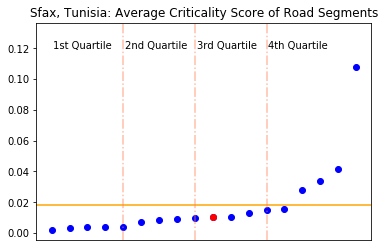

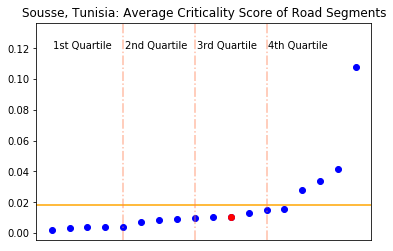

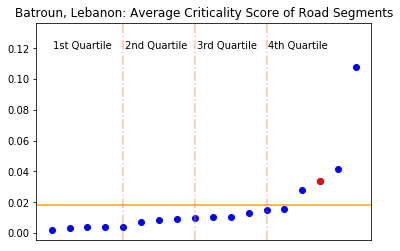

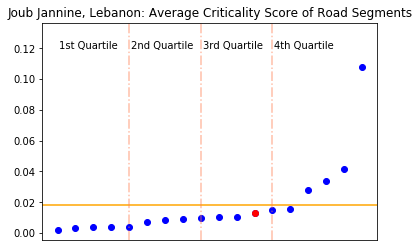

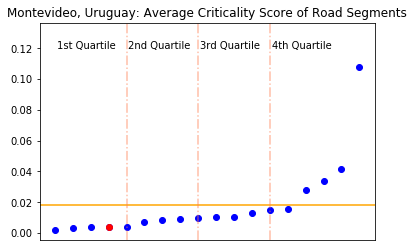

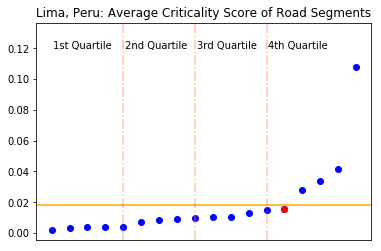

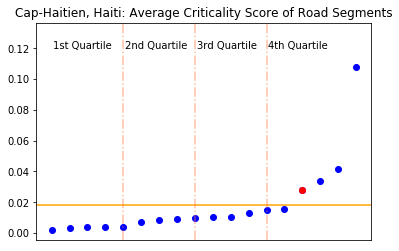

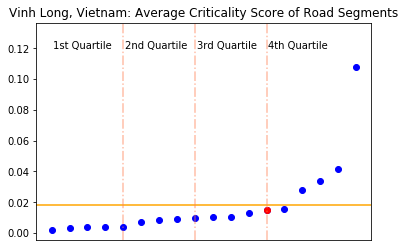

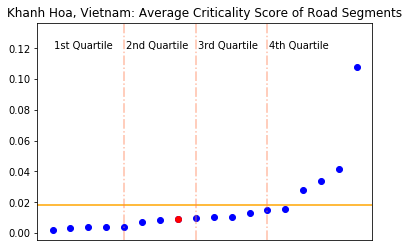

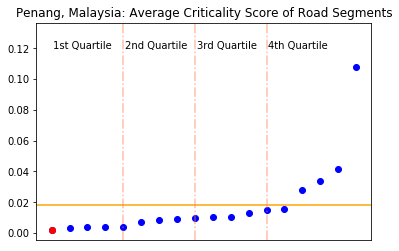

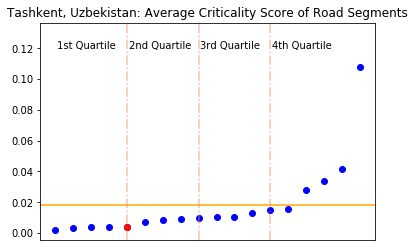

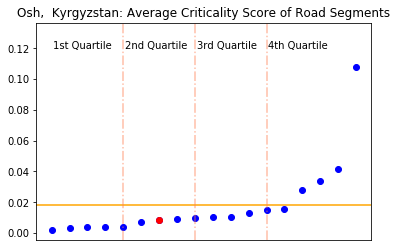

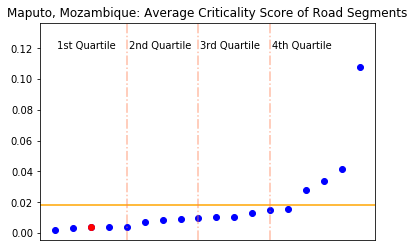

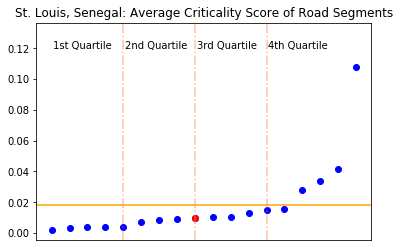

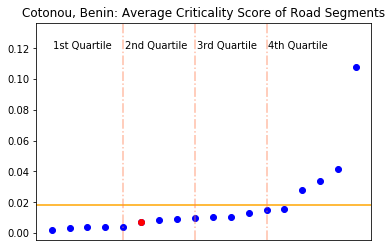

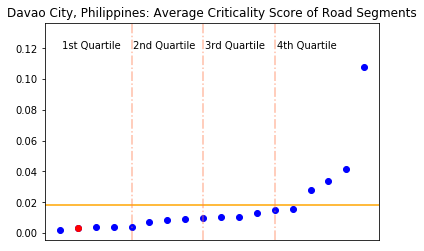

In [6]:
for i in city_scan_list:
    %time get_bc_plots(i)

### The function below calculates the maximum betweenness centrality for each of the cities. The node that represents this value is the most crucial intersection in the city and disruption of this node could create major issues to accessibility.

In [7]:
def get_maxbc_plots(place):
    
    string = place.split(',')[0]
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/*/Extended_*.csv')
    
    max_d = {}
    for i in extended_path_lis[1:]:
        d = pd.read_csv(i)
        city = i.split('/')[-2]
        max_d[city] = max(d.betweenness_centrality)
        
    avg_max = np.average(list(max_d.values()))
    
    max_name = []
    max_val = []
    for w in sorted(max_d, key=max_d.get, reverse=False):
         max_name.append(w), max_val.append(max_d[w])
    
    fig = pl.figure(figsize=(6,4))
    ax = pl.plot( max_name,max_val, 'bo')
    pl.xticks('')
    pl.axhline(y=avg_max, color='orange', linestyle='-')
    pl.ylabel('Maximum Betweenness Centrality', fontsize=12)
    #pl.text(x='Tashkent', y=avg_max+0.001, s='Average: {0:.3f}'.format(avg_max))
    #pl.xticks(rotation=60, fontsize=12)
    pl.plot( '{}'.format(string),max_d['{}'.format(string)], 'ro')
    #pl.text(x='{}'.format(string), y=max_d['{}'.format(string)]+0.001, s='{0:.3f}'.format(max_d['{}'.format(string)]))
    
    x = np.arange(16)
    y = [0.7 for i in range(16)]
    pl.plot(x, y , alpha=0)
    pl.axvline(x=4, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=8, color='coral', alpha=0.5, linestyle='-.')
    pl.axvline(x=12, color='coral', alpha=0.5, linestyle='-.')
    pl.text(0.1, 0.65, '1st Quartile')
    pl.text(4.1, 0.65, '2nd Quartile')
    pl.text(8.1, 0.65, '3rd Quartile')
    pl.text(12.1, 0.65, '4th Quartile')
    
    pl.title("{}: Road Criticality Disruption Potential ".format(place))
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_maxbc_plot.png'.format(string, string))

CPU times: user 632 ms, sys: 472 ms, total: 1.1 s
Wall time: 1.52 s
CPU times: user 640 ms, sys: 300 ms, total: 940 ms
Wall time: 978 ms
CPU times: user 628 ms, sys: 364 ms, total: 992 ms
Wall time: 1.02 s
CPU times: user 616 ms, sys: 344 ms, total: 960 ms
Wall time: 984 ms
CPU times: user 612 ms, sys: 280 ms, total: 892 ms
Wall time: 932 ms
CPU times: user 708 ms, sys: 316 ms, total: 1.02 s
Wall time: 1.11 s
CPU times: user 632 ms, sys: 376 ms, total: 1.01 s
Wall time: 1.05 s
CPU times: user 600 ms, sys: 368 ms, total: 968 ms
Wall time: 995 ms
CPU times: user 612 ms, sys: 360 ms, total: 972 ms
Wall time: 1.01 s
CPU times: user 596 ms, sys: 364 ms, total: 960 ms
Wall time: 983 ms
CPU times: user 620 ms, sys: 340 ms, total: 960 ms
Wall time: 998 ms
CPU times: user 632 ms, sys: 332 ms, total: 964 ms
Wall time: 987 ms
CPU times: user 584 ms, sys: 380 ms, total: 964 ms
Wall time: 986 ms
CPU times: user 592 ms, sys: 372 ms, total: 964 ms
Wall time: 991 ms
CPU times: user 612 ms, sys: 348 ms

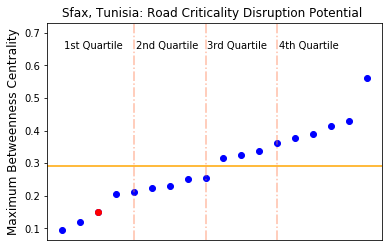

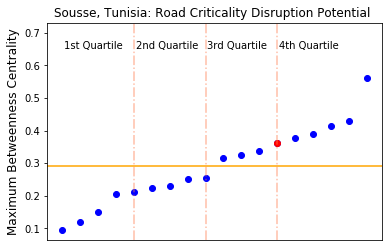

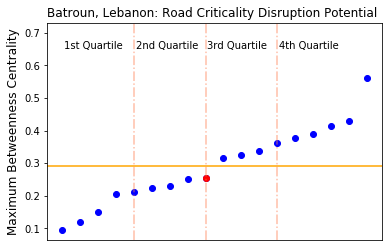

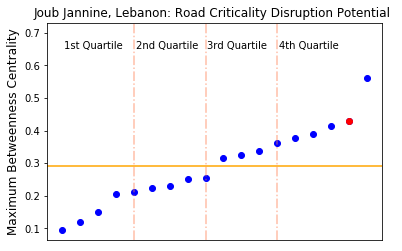

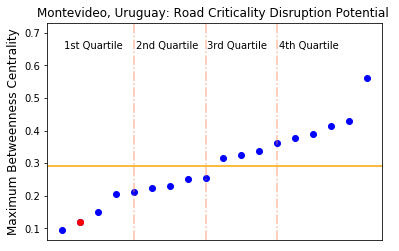

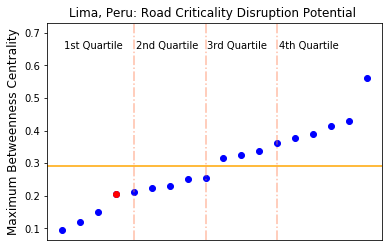

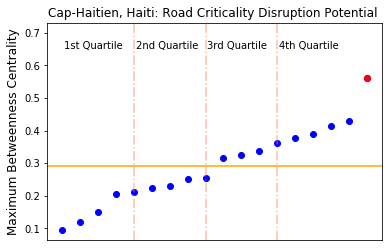

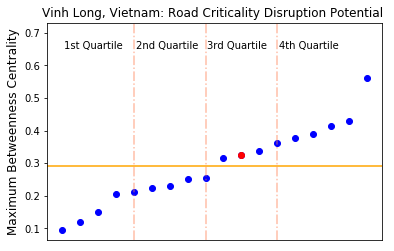

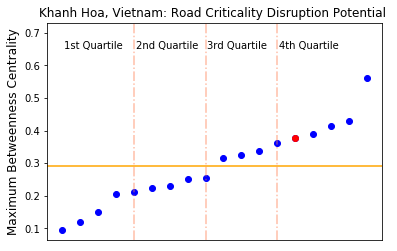

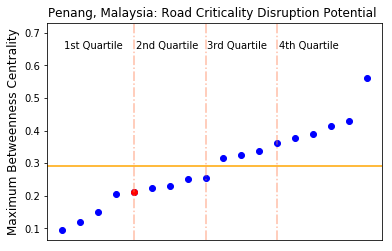

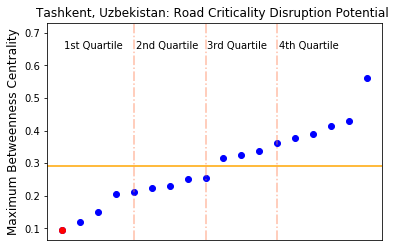

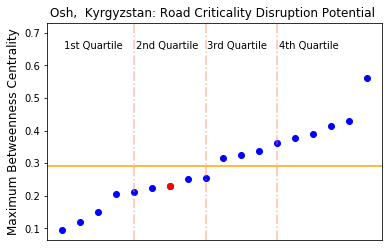

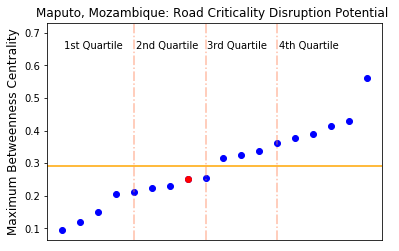

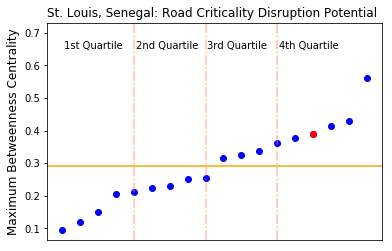

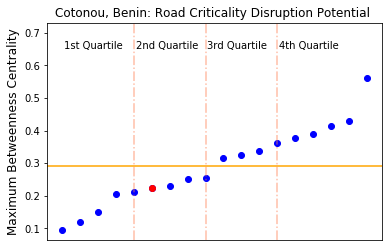

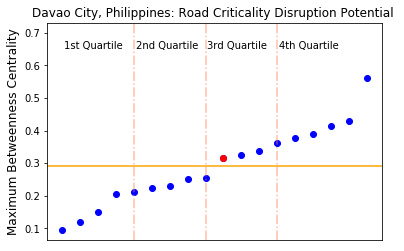

In [8]:
for i in city_scan_list:
    %time get_maxbc_plots(i)

### This function plots the graph and highlights the most critical node in the network.

In [35]:
def get_bc_graph_plots(place):
    
    string = place.split(',')[0]
    
    G = nx.read_gpickle("/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{a}/{b}".format(a=string, b=string))
    b = ox.basic_stats(G)
    
    #G_projected = ox.project_graph(G)
    node_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/nodes/nodes.shp'.format(string))
    extended_path_lis = glob('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/Extended_*.csv'.format(string))
    
    gdf_node = gpd.GeoDataFrame.from_file(node_lis[0])
    exten = pd.read_csv(extended_path_lis[0])
    exten= exten.rename(columns={'Unnamed: 0':'osmid'})
    exten['betweenness_centrality'] = exten['betweenness_centrality']*100
    
    max_node = exten[exten.betweenness_centrality == max(exten.betweenness_centrality)]['osmid'].values[0]
    max_bc = max(exten.betweenness_centrality)
    
    nc = ['r' if node==max_node else '#336699' for node in G.nodes()]
    ns = [80 if node==max_node else 8 for node in G.nodes()]
    
    print('{}: The most critical node has {:.2f}% of shortest journeys passing through it. \n'.format(place, max_bc))
    print('The road network of {} has {} nodes and {} edges \n\n'.format(string, b['n'], b['m']))
    fig, ax =  ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2, node_alpha=0.8, edge_alpha=0.8,
                            fig_height=8,fig_width=8)
    gdf_node[gdf_node.osmid ==  max_node].plot(ax=ax, color='red', zorder = 3)
    
    ax.set_title('{}: {:.2f}% of shortest paths between all nodes in the network through this node '.format(string, max_bc), fontsize=15)
    
    

    print('\n\n\n')
    
    fig.savefig('/nfshome/gb1877/gb1877/WorldBank/CRP/Betweenness_Centrality/data/{}/{}_bc_graph_plot.png'.format(string, string))

Tashkent, Uzbekistan: The most critical node has 9.36% of shortest journeys passing through it. 

The road network of Tashkent has 14749 nodes and 37140 edges 




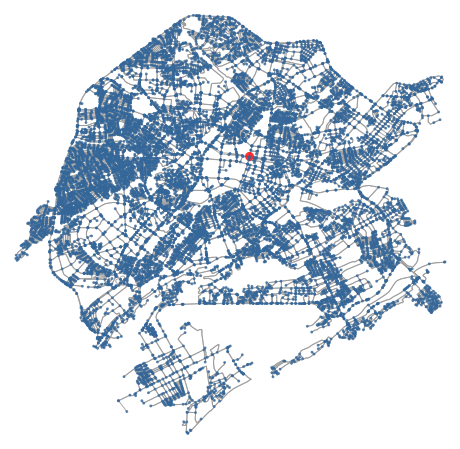





Montevideo, Uruguay: The most critical node has 11.89% of shortest journeys passing through it. 

The road network of Montevideo has 16929 nodes and 46855 edges 




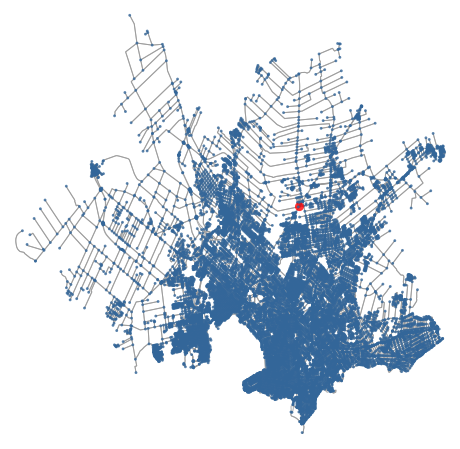





Sfax, Tunisia: The most critical node has 15.14% of shortest journeys passing through it. 

The road network of Sfax has 3807 nodes and 9780 edges 




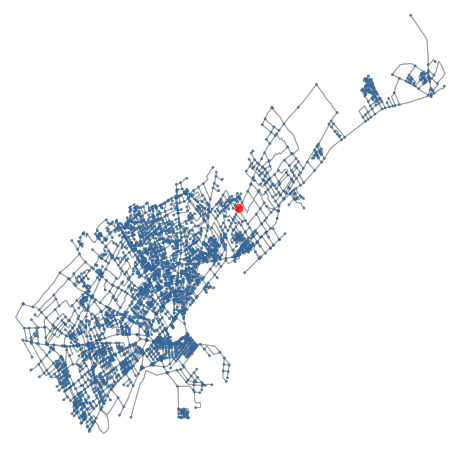





Lima, Peru: The most critical node has 20.45% of shortest journeys passing through it. 

The road network of Lima has 2456 nodes and 5643 edges 




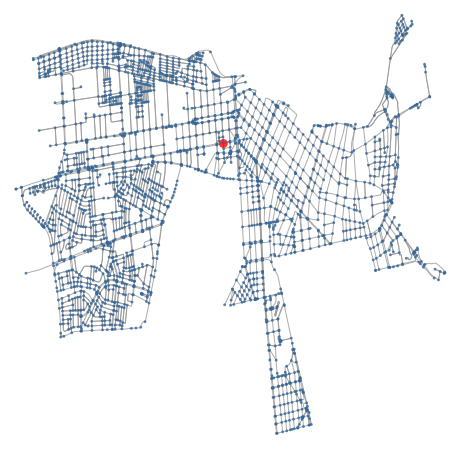





Penang, Malaysia: The most critical node has 21.19% of shortest journeys passing through it. 

The road network of Penang has 45047 nodes and 108057 edges 




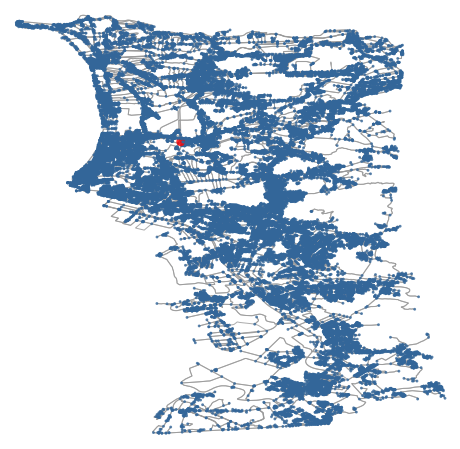





Cotonou, Benin: The most critical node has 22.32% of shortest journeys passing through it. 

The road network of Cotonou has 7377 nodes and 20944 edges 




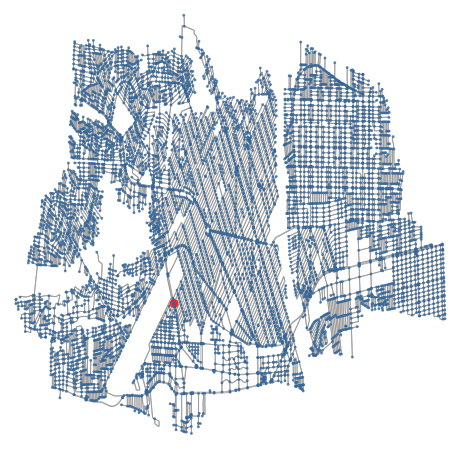





Osh,  Kyrgyzstan: The most critical node has 22.91% of shortest journeys passing through it. 

The road network of Osh has 4435 nodes and 11591 edges 




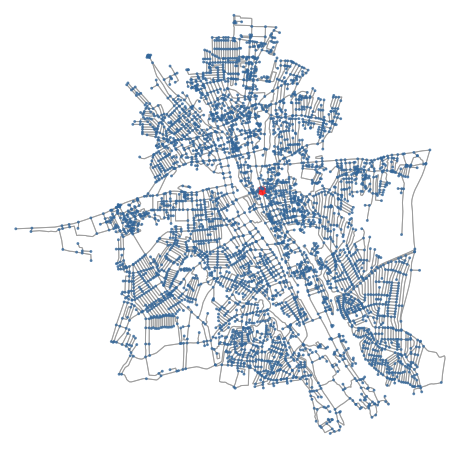





Maputo, Mozambique: The most critical node has 25.06% of shortest journeys passing through it. 

The road network of Maputo has 19330 nodes and 56445 edges 




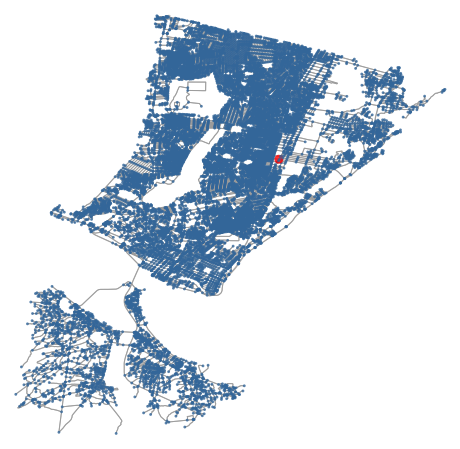





Batroun, Lebanon: The most critical node has 25.52% of shortest journeys passing through it. 

The road network of Batroun has 380 nodes and 939 edges 




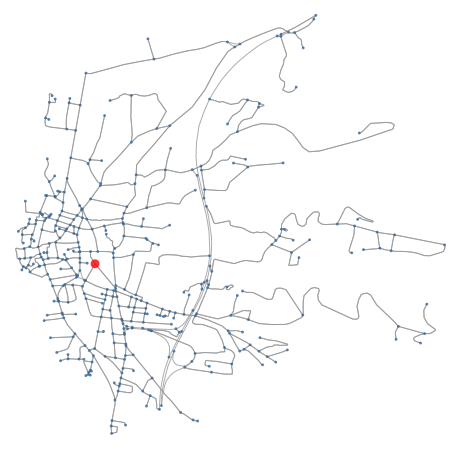





Davao City, Philippines: The most critical node has 31.50% of shortest journeys passing through it. 

The road network of Davao City has 19603 nodes and 52858 edges 




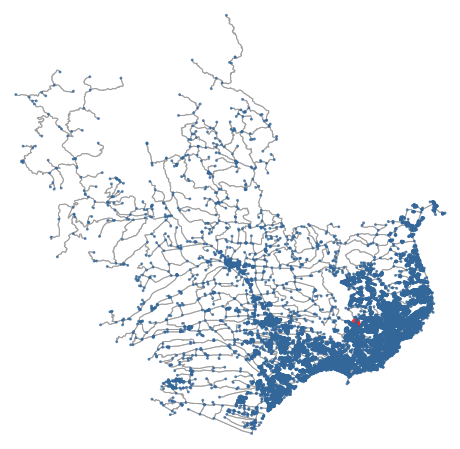





Vinh Long, Vietnam: The most critical node has 32.61% of shortest journeys passing through it. 

The road network of Vinh Long has 1761 nodes and 4348 edges 




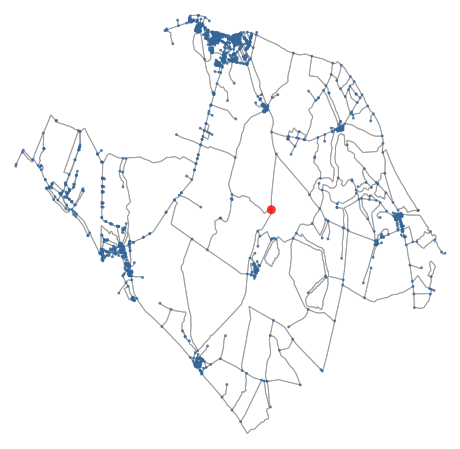





Sousse, Tunisia: The most critical node has 36.25% of shortest journeys passing through it. 

The road network of Sousse has 3964 nodes and 11043 edges 




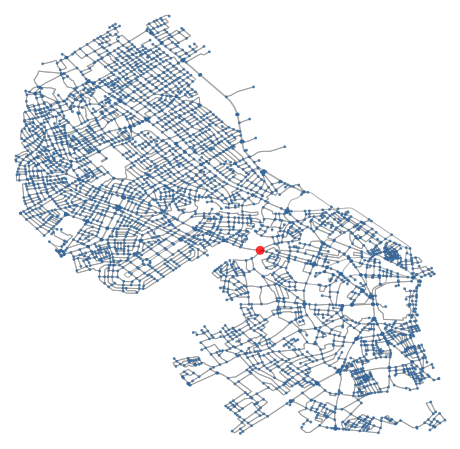





Khanh Hoa, Vietnam: The most critical node has 37.84% of shortest journeys passing through it. 

The road network of Khanh Hoa has 6677 nodes and 17296 edges 




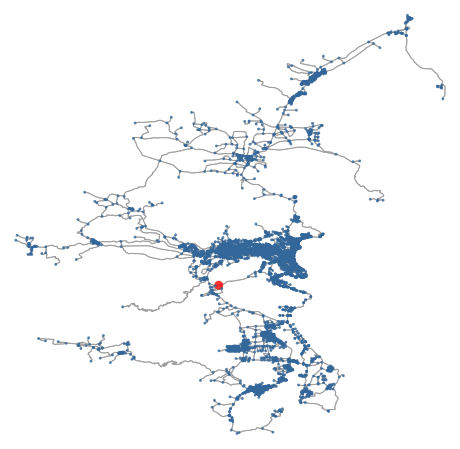





St. Louis, Senegal: The most critical node has 38.97% of shortest journeys passing through it. 

The road network of St. Louis has 5544 nodes and 16442 edges 




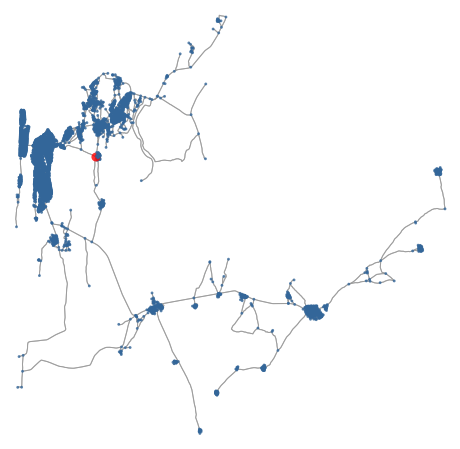





Coron, Philippines: The most critical node has 41.24% of shortest journeys passing through it. 

The road network of Coron has 548 nodes and 1356 edges 




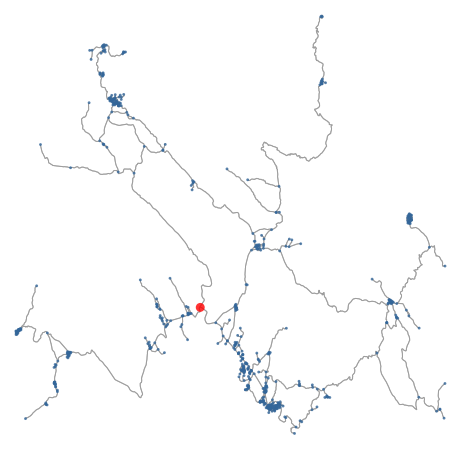





Joub Jannine, Lebanon: The most critical node has 42.98% of shortest journeys passing through it. 

The road network of Joub Jannine has 2208 nodes and 5772 edges 




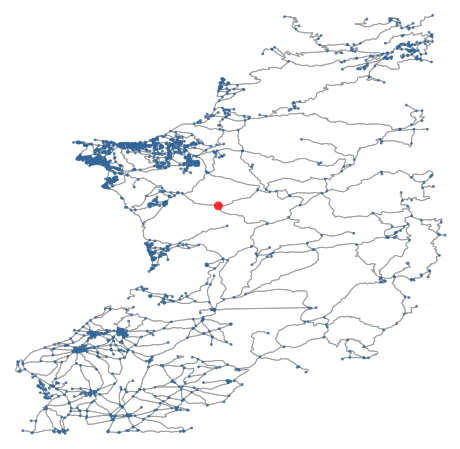





Cap-Haitien, Haiti: The most critical node has 56.22% of shortest journeys passing through it. 

The road network of Cap-Haitien has 1645 nodes and 4833 edges 




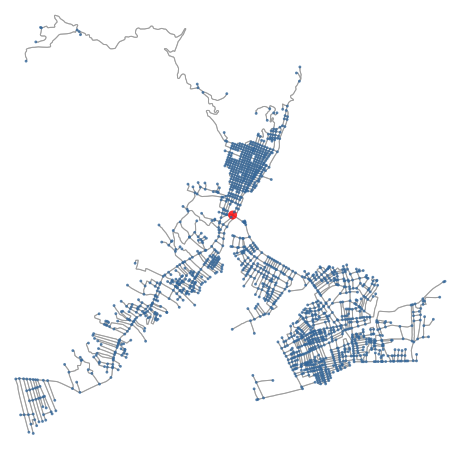

In [38]:
for i in city_scan_list:
    get_bc_graph_plots(i)